In [120]:
import matplotlib.pyplot as plt
import ast
import json
import numpy as np
import sys
import statistics
from scipy import stats
import collections
RAN_GTEX = "./../gtex_hallmark_random.log"
NR_ACC_GTEX= "../logs/gtex_v7_hallmark_results.log"
NR_ACC_PAN = "../logs/panTCGA_hallmark_results.log"
RAN_PAN = "../panTCGA_hallmark_random.log"

In [102]:
#Get Accuracies
accurs = {}
with open(NR_ACC_GTEX, "r") as f:
            for line in f:
                line = line.split('\t')
                accurs[line[0]] = float(line[1])

In [138]:
od = collections.OrderedDict(sorted(accurs.items()))
od.values()

odict_values([0.888105, 0.891815, 0.874087, 0.849759, 0.90623, 0.797423, 0.8936, 0.873888, 0.862872, 0.893458, 0.911498, 0.852535, 0.890569, 0.917757, 0.919994, 0.91804, 0.89207, 0.903285, 0.906684, 0.82277, 0.898895, 0.897564, 0.90269, 0.827556, 0.912121, 0.751968, 0.864203, 0.91215, 0.924356, 0.905721, 0.893826, 0.857916, 0.790626, 0.912206, 0.795809, 0.847154, 0.91569, 0.808581, 0.866044, 0.881705, 0.878929, 0.814359, 0.871679, 0.856386, 0.872019, 0.852846, 0.913594, 0.902492, 0.842453, 0.885302])

In [140]:
#Get Gene Counts
with open("../logs/hallmark_gene_counts.json") as f:
    gene_count_dict = json.load(f)

In [141]:
datasets = list(sorted(gene_count_dict.keys()))


In [142]:
gene_counts = []
for key in datasets:
    gene_counts.append(gene_count_dict[key])

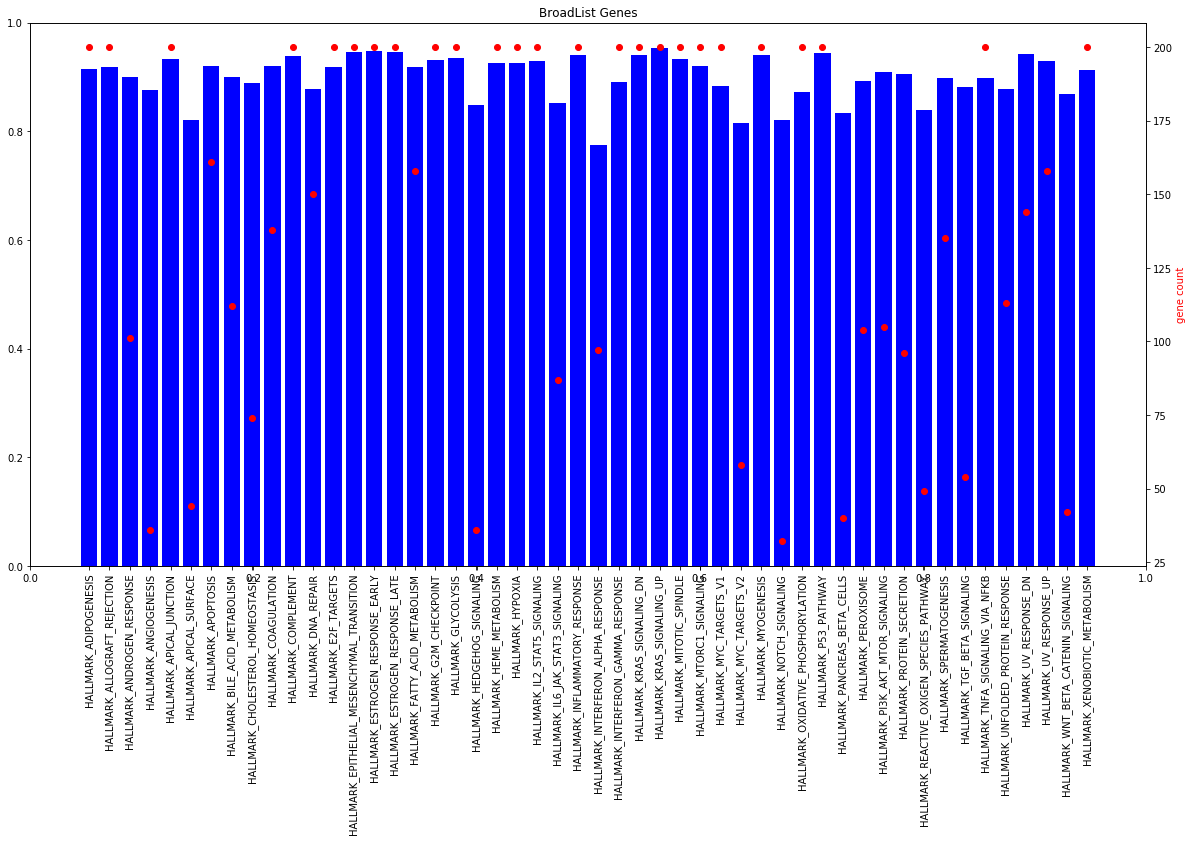

In [143]:
plt.clf()
x = np.arange(len(datasets))

fig = plt.figure(figsize=(20,10))
plt.title("BroadList Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax1 = fig.add_subplot(111)
ax1.get_yaxis().set_visible(False)
ax2=fig.add_subplot(111, frame_on=False)

ax1.bar(x, od.values(), color='b')
ax1.set_ylabel('accuracy',color='b')

ax2 = ax1.twinx()
ax2.scatter(x, gene_counts, color='r')
ax2.yaxis.tick_right()
ax2.xaxis.tick_bottom()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('gene count', color='r')

plt.show()

In [144]:
#Get Accuracies
accurs_r = {}
with open(RAN_GTEX, "r") as f:
            for line in f:
                line = line.split('\t')
                accurs_r[line[0]] = float(line[1])

In [145]:
accurs_r

{'101': 0.810025,
 '104': 0.813764,
 '105': 0.801501,
 '112': 0.810818,
 '113': 0.822826,
 '135': 0.822883,
 '138': 0.831464,
 '144': 0.832087,
 '150': 0.820447,
 '158': 0.843953,
 '161': 0.835967,
 '200': 0.84925,
 '32': 0.653922,
 '36': 0.666893,
 '40': 0.726281,
 '42': 0.711158,
 '44': 0.691249,
 '49': 0.660323,
 '54': 0.738006,
 '58': 0.735571,
 '74': 0.757462,
 '87': 0.76375,
 '96': 0.805976,
 '97': 0.797225}

In [146]:
rand_data = {}
for hallmark in accurs.keys():
        num_genes=gene_count_dict[hallmark]
        rand_data[hallmark] = accurs_r[str(num_genes)]
        
        
            

In [147]:
rand_data

{'HALLMARK_ADIPOGENESIS': 0.84925,
 'HALLMARK_ALLOGRAFT_REJECTION': 0.84925,
 'HALLMARK_ANDROGEN_RESPONSE': 0.810025,
 'HALLMARK_ANGIOGENESIS': 0.666893,
 'HALLMARK_APICAL_JUNCTION': 0.84925,
 'HALLMARK_APICAL_SURFACE': 0.691249,
 'HALLMARK_APOPTOSIS': 0.835967,
 'HALLMARK_BILE_ACID_METABOLISM': 0.810818,
 'HALLMARK_CHOLESTEROL_HOMEOSTASIS': 0.757462,
 'HALLMARK_COAGULATION': 0.831464,
 'HALLMARK_COMPLEMENT': 0.84925,
 'HALLMARK_DNA_REPAIR': 0.820447,
 'HALLMARK_E2F_TARGETS': 0.84925,
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION': 0.84925,
 'HALLMARK_ESTROGEN_RESPONSE_EARLY': 0.84925,
 'HALLMARK_ESTROGEN_RESPONSE_LATE': 0.84925,
 'HALLMARK_FATTY_ACID_METABOLISM': 0.843953,
 'HALLMARK_G2M_CHECKPOINT': 0.84925,
 'HALLMARK_GLYCOLYSIS': 0.84925,
 'HALLMARK_HEDGEHOG_SIGNALING': 0.666893,
 'HALLMARK_HEME_METABOLISM': 0.84925,
 'HALLMARK_HYPOXIA': 0.84925,
 'HALLMARK_IL2_STAT5_SIGNALING': 0.84925,
 'HALLMARK_IL6_JAK_STAT3_SIGNALING': 0.76375,
 'HALLMARK_INFLAMMATORY_RESPONSE': 0.84925,
 'HALL

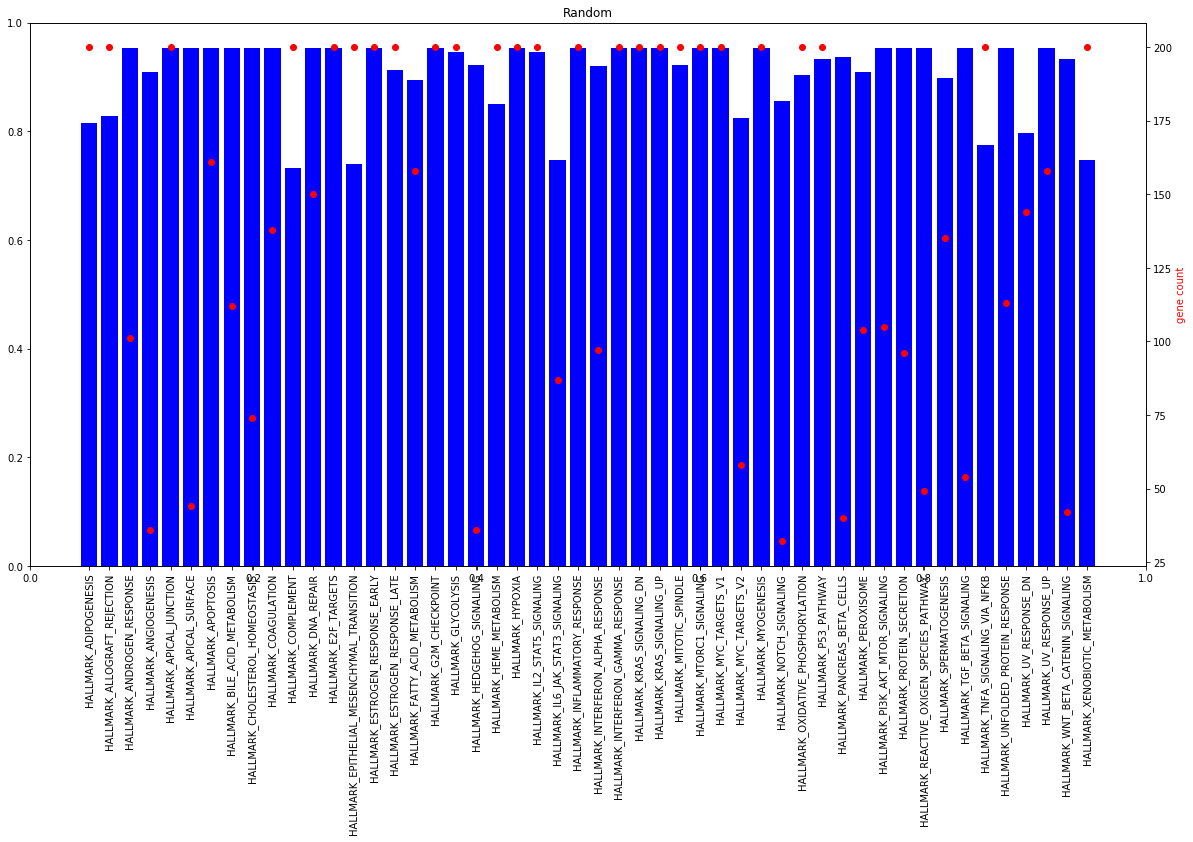

In [148]:
plt.clf()

x = np.arange(len(datasets))

fig = plt.figure(figsize=(20,10))
plt.title("Random") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax1 = fig.add_subplot(111)
ax1.get_yaxis().set_visible(False)
ax2=fig.add_subplot(111, frame_on=False)

ax1.bar(x, rand_data.values(), color='b')
ax1.set_ylabel('accuracy',color='b')

ax2 = ax1.twinx()
ax2.scatter(x, gene_counts, color='r')
ax2.yaxis.tick_right()
ax2.xaxis.tick_bottom()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('gene count', color='r')

plt.show()

In [170]:
accurs_list = list(od.values())
od2= collections.OrderedDict(sorted(rand_data.items()))
rand_accurs_list = list(od2.values())

In [171]:
od.values()

odict_values([0.888105, 0.891815, 0.874087, 0.849759, 0.90623, 0.797423, 0.8936, 0.873888, 0.862872, 0.893458, 0.911498, 0.852535, 0.890569, 0.917757, 0.919994, 0.91804, 0.89207, 0.903285, 0.906684, 0.82277, 0.898895, 0.897564, 0.90269, 0.827556, 0.912121, 0.751968, 0.864203, 0.91215, 0.924356, 0.905721, 0.893826, 0.857916, 0.790626, 0.912206, 0.795809, 0.847154, 0.91569, 0.808581, 0.866044, 0.881705, 0.878929, 0.814359, 0.871679, 0.856386, 0.872019, 0.852846, 0.913594, 0.902492, 0.842453, 0.885302])

In [172]:
od2.values()

odict_values([0.84925, 0.84925, 0.810025, 0.666893, 0.84925, 0.691249, 0.835967, 0.810818, 0.757462, 0.831464, 0.84925, 0.820447, 0.84925, 0.84925, 0.84925, 0.84925, 0.843953, 0.84925, 0.84925, 0.666893, 0.84925, 0.84925, 0.84925, 0.76375, 0.84925, 0.797225, 0.84925, 0.84925, 0.84925, 0.84925, 0.84925, 0.84925, 0.735571, 0.84925, 0.653922, 0.84925, 0.84925, 0.726281, 0.813764, 0.801501, 0.805976, 0.660323, 0.822883, 0.738006, 0.84925, 0.822826, 0.832087, 0.843953, 0.711158, 0.84925])

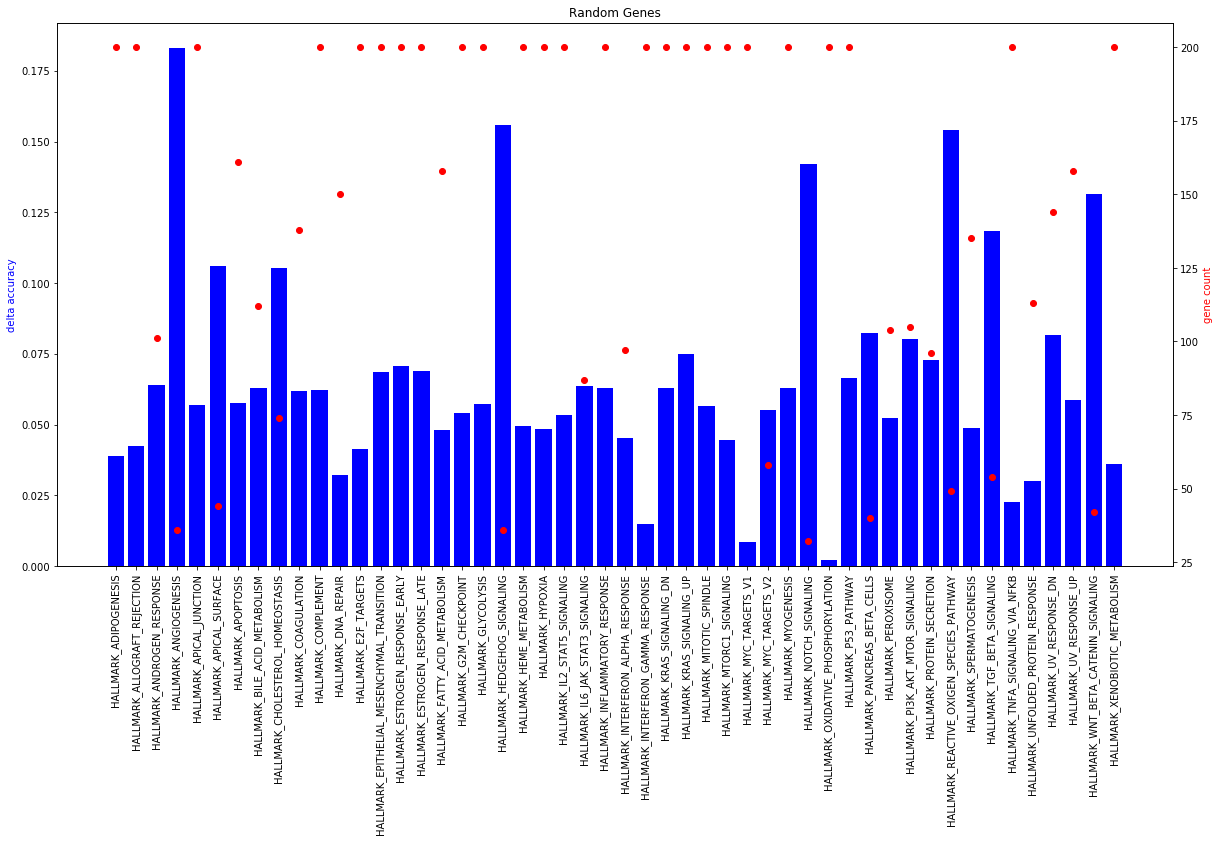

In [166]:
accur_diff = [abs(accurs_list[i] - rand_accurs_list[i]) for i in range(len(od))]
fig = plt.figure(figsize=(20,10))
plt.title("Random Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax3 = fig.add_subplot(111)
ax4=fig.add_subplot(111)

ax3.bar(x,accur_diff, color='b')
ax3.set_ylabel('delta accuracy',color='b')

ax4 = ax3.twinx()
ax4.scatter(x, gene_counts, color='r')
ax4.yaxis.tick_right()
ax4.xaxis.tick_bottom()
ax4.yaxis.set_label_position('right') 
ax4.set_ylabel('gene count', color='r')

plt.show()
